In [55]:
import torch
import scipy.stats
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from IPython import display

from graph_plot_tools import *
from utils import *


In [3]:
x_label = "batch count"
title_fontsize = 14
xy_label_fontsize = 14

### For BERT tuning

In [3]:
hists_names_list = [
    "bert_train_hist_combined",
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [4]:
chosen_exp_names = {
 'Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1',
 'SGD, 0.001, 0.9, bs_mul = 1',
 'clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1',
 'clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1'
}
new_hist = []
for h in hist:
    if h["name"] in chosen_exp_names:
        new_hist.append(h)
hist = new_hist

In [5]:
grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

grouped_hist = grouped_hist[0:4]

def key(h, alpha=0.01):
    return smooth(h["train_loss"], alpha)[-1]

grouped_hist = sorted(grouped_hist, key=key)[:10]

Repeats_1 = 100.0, Name = Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1
Repeats_1 = 100.0, Name = SGD, 0.001, 0.9, bs_mul = 1
Repeats_1 = 100.0, Name = clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1
Repeats_1 = 100.0, Name = clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1


#### Loss functions

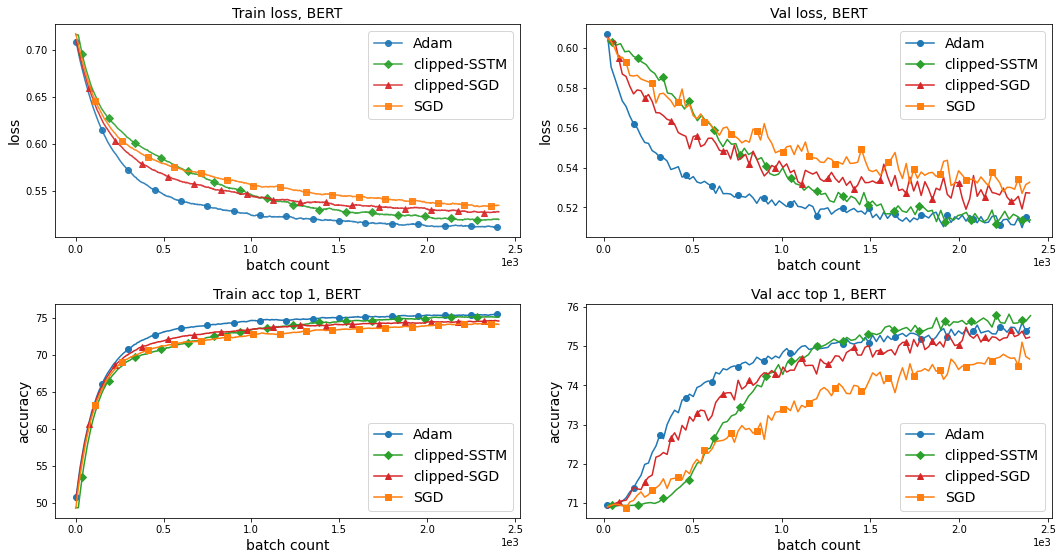

In [6]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(2,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 'Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1': {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 'SGD, 0.001, 0.9, bs_mul = 1': {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 'clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1': {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 'clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1': {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 }
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, BERT", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax3 = make_plot(
    ax3, grouped_hist, "train_acc_top_1", "train_x", 
    title="Train acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.01, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_acc_top_1", "val_x", 
    title="Val acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

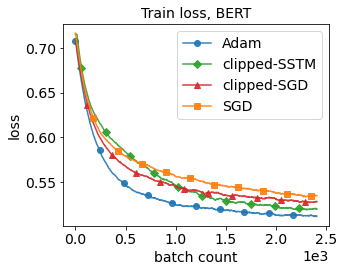

In [7]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=9, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_train_loss.pdf'

plt.savefig(PATH, format='pdf')

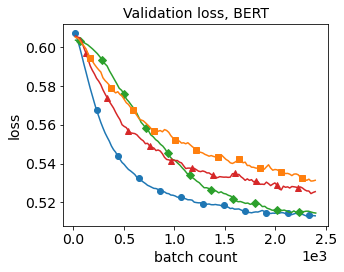

In [8]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_val_loss.pdf'

plt.savefig(PATH, format='pdf')

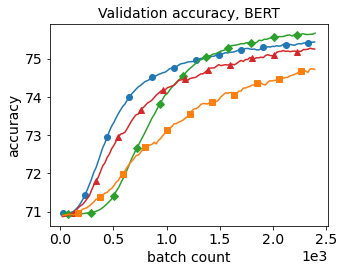

In [9]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_acc_top_1", "val_x", 
    title="Validation accuracy, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_val_acc.pdf'

plt.savefig(PATH, format='pdf')

#### Gradient norms

In [10]:
hists_names_list = [
    "bert_0_iteration_norm_distr"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [11]:
for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 80.0, Name = same


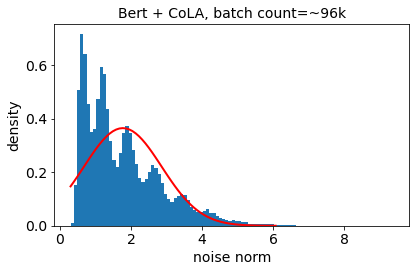

In [12]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + CoLA", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs/BERT_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

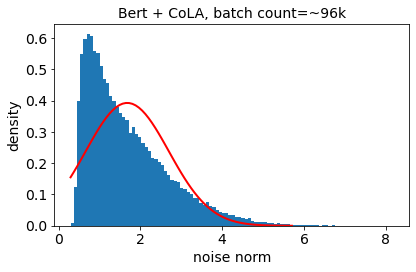

In [13]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + CoLA", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=1, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs/BERT_norm_diffs_second.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

### For ResNet-18 on ImageNet-100

In [14]:
hists_names_list = [
    "resnet_18_train_hist_combined"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [15]:
chosen_exp_names = {
    'Adam, 1e-3, bs_mul = 4',
    'SGD, 0.01, 0.9, bs_mul = 1',
    'clipped_SSTM, 0.01, 10, norm, 1, bs_mul = 2, nu=1',
#     'SGD, 0.05, 0.9, bs_mul = 2',
    'clipped_SGD, 5e-2, 0.9, coordinate_wise, 0.1, bs_mul = 1'}
new_hist = []
for h in hist:
    if h["name"] in chosen_exp_names:
        new_hist.append(h)
hist = new_hist

In [16]:
grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1", "train_acc_top_5", "val_acc_top_5"], 
    verbose=True,
    group_norm_diffs=True
)

def key(h, alpha=1):
    return smooth(h["val_loss"], alpha)[-1]

grouped_hist = sorted(grouped_hist, key=key)

Repeats_1 = 5.0, Name = clipped_SGD, 5e-2, 0.9, coordinate_wise, 0.1, bs_mul = 1
Repeats_1 = 5.0, Name = Adam, 1e-3, bs_mul = 4
Repeats_1 = 5.0, Name = clipped_SSTM, 0.01, 10, norm, 1, bs_mul = 2, nu=1
Repeats_1 = 5.0, Name = SGD, 0.01, 0.9, bs_mul = 1


#### Loss functions

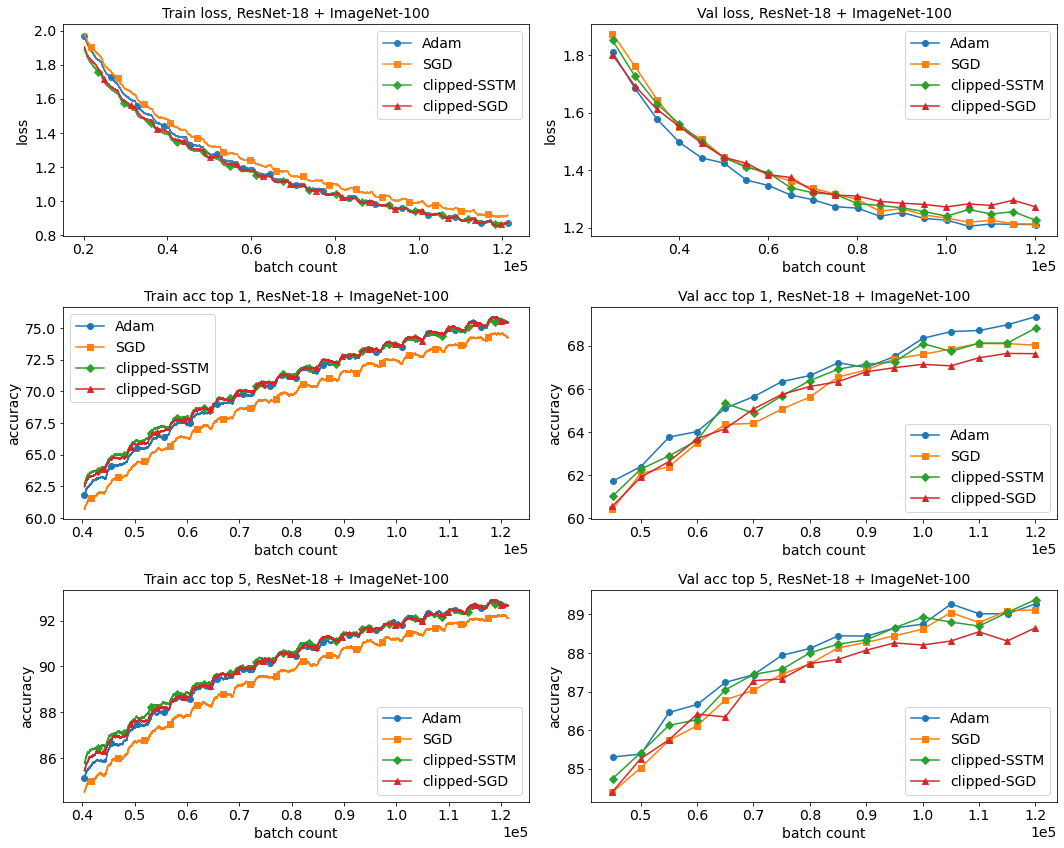

In [17]:
fig = plt.figure(figsize=(15,12))
gs = GridSpec(3,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 'Adam, 1e-3, bs_mul = 4': {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 'SGD, 0.01, 0.9, bs_mul = 1': {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
#  'SGD, 0.05, 0.9, bs_mul = 2': {
#      "name": "SGD",
#      "line_color": colors[4], "line_style": "-",
#      "line_marker": "s", "mark_every": "auto"
#  },
 'clipped_SSTM, 0.01, 10, norm, 1, bs_mul = 2, nu=1': {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 'clipped_SGD, 5e-2, 0.9, coordinate_wise, 0.1, bs_mul = 1': {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 }
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, ResNet-18 + ImageNet-100", y_label="loss", x_label=x_label, 
    eps=0.001, alpha=0.9, starting_epoch=5, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, ResNet-18 + ImageNet-100", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=5, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax3 = make_plot(
    ax3, grouped_hist, "train_acc_top_1", "train_x", 
    title="Train acc top 1, ResNet-18 + ImageNet-100", y_label="accuracy", x_label=x_label, 
    eps=0.001, alpha=1.0, starting_epoch=10, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_acc_top_1", "val_x", 
    title="Val acc top 1, ResNet-18 + ImageNet-100", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=10, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax5 = make_plot(
    ax5, grouped_hist, "train_acc_top_5", "train_x", 
    title="Train acc top 5, ResNet-18 + ImageNet-100", y_label="accuracy", x_label=x_label, 
    eps=0.001, alpha=1.0, starting_epoch=10, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax6 = make_plot(
    ax6, grouped_hist, "val_acc_top_5", "val_x", 
    title="Val acc top 5, ResNet-18 + ImageNet-100", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=10, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

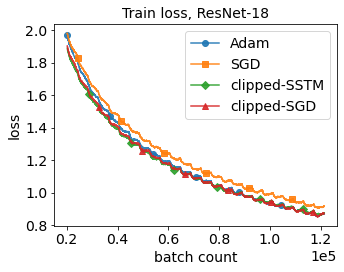

In [18]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, ResNet-18", y_label="loss", x_label=x_label, 
    eps=0.001, alpha=0.9, starting_epoch=5, draw_epoch_lines=False, grid=False, 
    mark_every_count=5, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/ResNet-18_train_loss.pdf'

plt.savefig(PATH, format='pdf')

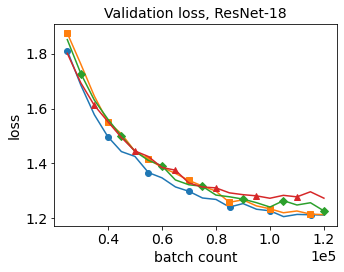

In [19]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, ResNet-18", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=5, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=5, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/ResNet-18_val_loss.pdf'

plt.savefig(PATH, format='pdf')

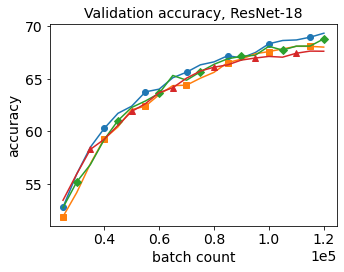

In [20]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_acc_top_1", "val_x", 
    title="Validation accuracy, ResNet-18", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=5, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=5, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/ResNet-18_val_acc.pdf'

plt.savefig(PATH, format='pdf')

#### Gradient norms

In [21]:
hists_names_list = [
    "resnet_18_0_iteration_norm_distr"
]

hist = load_hist_jsons(hists_names_list)

new_hist = []
for h in hist:
    new_hist.append({"train_loss": [1], "norm_diffs": [h]})
    
hist = hist_from_json(new_hist)

In [22]:
for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 15.0, Name = same


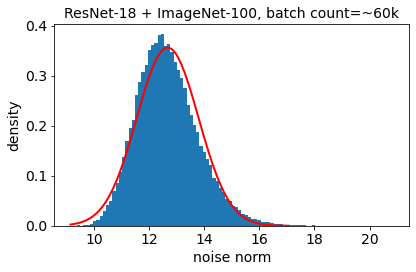

In [23]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="ResNet-18 + ImageNet-100", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs/ResNet-18_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

### Bert, batch-size/lr

In [24]:
hists_names_list = [ 
    "bert_2021-06-01_01_06_28_train_hist", # 48 sstm gridsearch rs = 73-74 ######
    "bert_2021-05-31_20_29_43_train_hist", # 48 sstm gridsearch rs = 71-72 ######
    "bert_2021-05-28_22_15_20_train_hist", # 47 sstm gridsearch rs = 71-72 ######
    "bert_2021-05-28_17_58_57_train_hist", # 47 sstm gridsearch rs = 69-70 ######
    "bert_2021-05-12_05_58_04_train_hist",  # bert, normal opts, sstm gridsearch rs = 49-50 ######
    "bert_2021-05-12_00_04_46_train_hist",  # bert, normal opts, sstm gridsearch rs = 48 ######
    "bert_2021-05-11_21_09_21_train_hist",  # bert, normal opts, sstm gridsearch rs = 47 ######
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [25]:
# for h in hist:
#     h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 60.0, Name = clipped_SSTM, 0.00125, 10, norm, 1, bs_mul = 1, nu=1
Repeats_1 = 60.0, Name = clipped_SSTM, 0.005, 10, norm, 1, bs_mul = 2, nu=1
Repeats_1 = 60.0, Name = clipped_SSTM, 0.02, 10, norm, 1, bs_mul = 4, nu=1
Repeats_1 = 60.0, Name = clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1


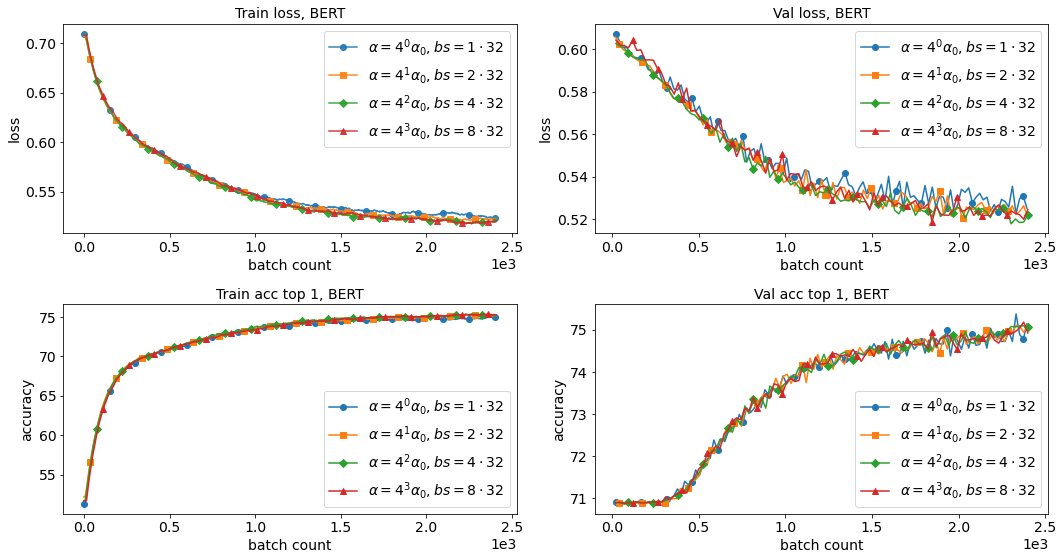

In [26]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(2,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 'clipped_SSTM, 0.00125, 10, norm, 1, bs_mul = 1, nu=1': {
     "name": r"$\alpha=4^0\alpha_0, bs=1\cdot32$",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 'clipped_SSTM, 0.005, 10, norm, 1, bs_mul = 2, nu=1': {
     "name": r"$\alpha=4^1\alpha_0, bs=2\cdot32$",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 'clipped_SSTM, 0.02, 10, norm, 1, bs_mul = 4, nu=1': {
     "name": r"$\alpha=4^2\alpha_0, bs=4\cdot32$",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 'clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1': {
     "name": r"$\alpha=4^3\alpha_0, bs=8\cdot32$",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 }
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, BERT", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax3 = make_plot(
    ax3, grouped_hist, "train_acc_top_1", "train_x", 
    title="Train acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.01, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_acc_top_1", "val_x", 
    title="Val acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

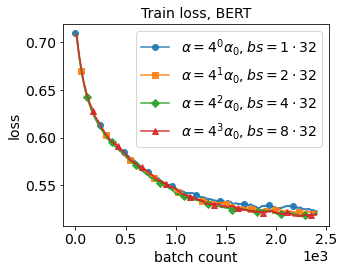

In [27]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=9, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_alpha-bs_relation_train_loss.pdf'

plt.savefig(PATH, format='pdf')

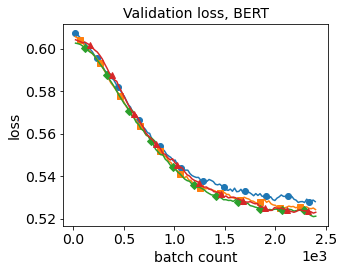

In [28]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_alpha-bs_relation_val_loss.pdf'

plt.savefig(PATH, format='pdf')

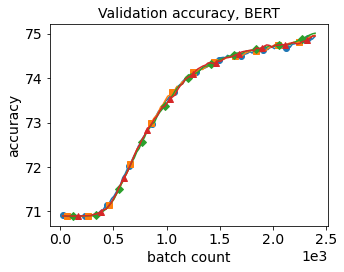

In [29]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_acc_top_1", "val_x", 
    title="Validation accuracy, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs/BERT_alpha-bs_relation_val_acc.pdf'

plt.savefig(PATH, format='pdf')

### Bert noise evolution

In [5]:
hists_names_list = [
    "bert_0_iteration_norm_distr"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [6]:
# for h in hist:
#     h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 20.0, Name = Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1
Repeats_1 = 20.0, Name = SGD, 0.001, 0.9, bs_mul = 1
Repeats_1 = 20.0, Name = clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1
Repeats_1 = 20.0, Name = clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1


In [7]:
line_params = {
 'Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1': {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 'SGD, 0.001, 0.9, bs_mul = 1': {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 'clipped_SSTM, 0.08, 10, norm, 1, bs_mul = 8, nu=1': {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 'clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1': {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 }
}

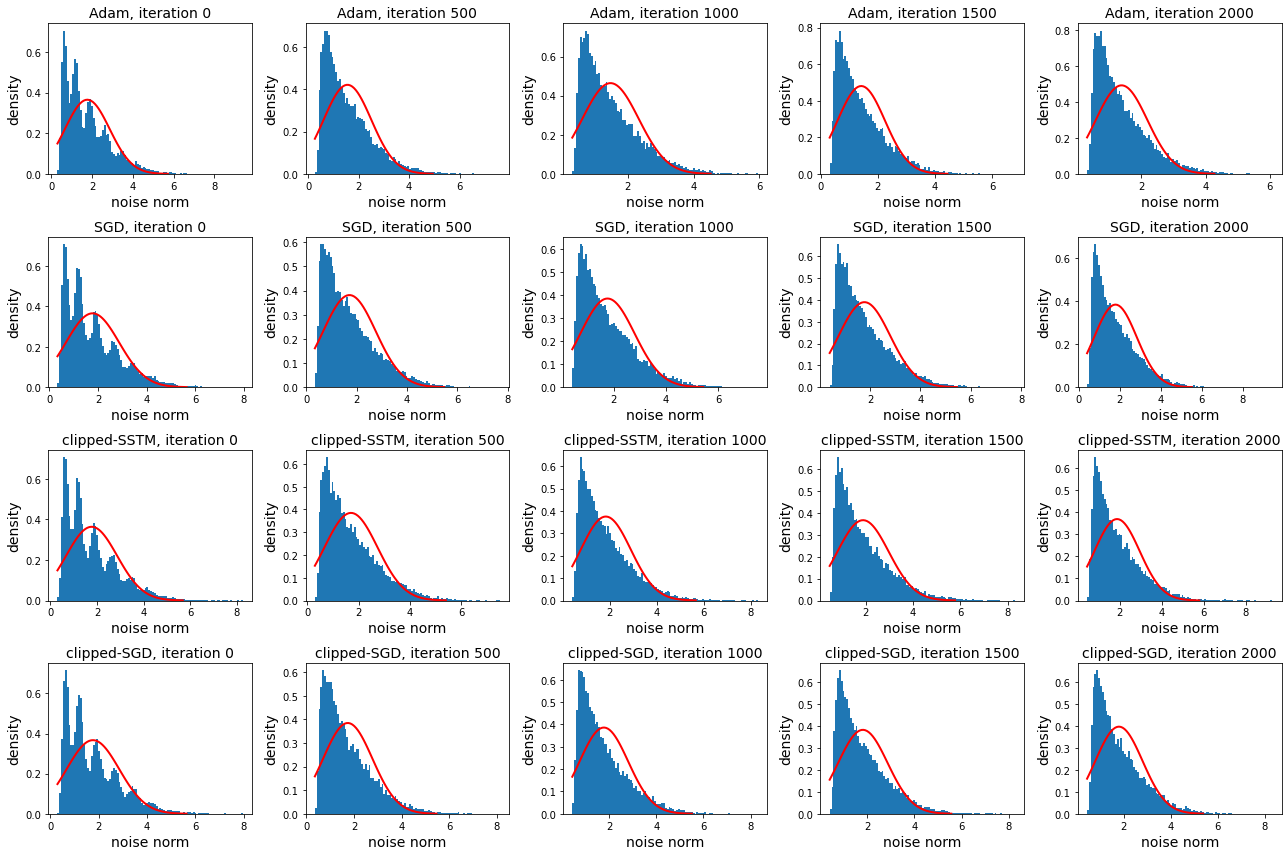

In [8]:
fig = plt.figure(figsize=(18,12))
k = 5
gs = GridSpec(4,k, figure=fig)

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

for j in range(4):
    for i in range(0, k):
        gh = [grouped_hist[j]]
        ax = fig.add_subplot(gs[j,i])
        draw_norm_hists_for_one_model(
            ax, gh, 
            title="{}, iteration {}".format(
                line_params[gh[0]["name"]]["name"], 
                (int(gh[0]["norm_diffs_x"][i]) // 500 * 500)
            ), y_label="density", x_label="noise norm", 
            bins_n=100, draw_normal=True, number=i, grid=False, 
            add_batch_count=False, round_batch_count=True, 
            title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
        )

gs.tight_layout(fig)

PATH = './graphs/BERT_norm_diffs_evolution.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

##### BERT, Adam, first iterations

In [11]:
hists_names_list = [
    "bert_2021-06-21_03_26_12_train_hist"
#     "bert_2021-06-20_18_58_58_train_hist"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [12]:
grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 20.0, Name = Adam, 5e-5, eps 1e-8, weight_decay 0.0005, bs_mul = 1


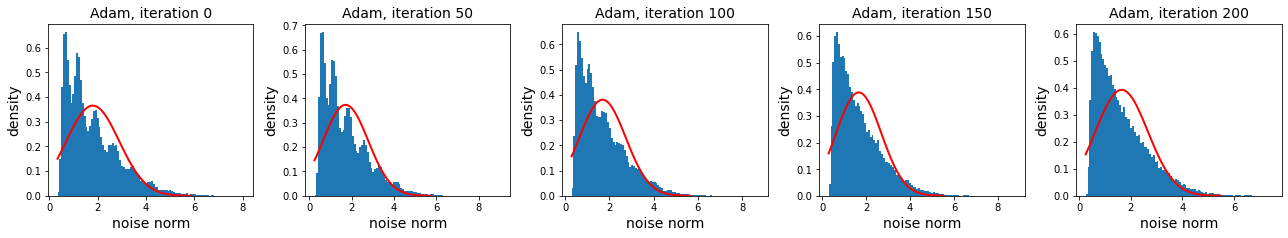

In [15]:
fig = plt.figure(figsize=(18,12))
k = 5
gs = GridSpec(4,k, figure=fig)

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

for j in range(1):
    for i in range(0, k):
        gh = [grouped_hist[j]]
        ax = fig.add_subplot(gs[j,i])
        draw_norm_hists_for_one_model(
            ax, gh, 
            title="{}, iteration {}".format(
                line_params[gh[0]["name"]]["name"], 
                (int(gh[0]["norm_diffs_x"][i]) // 50 * 50)
            ), y_label="density", x_label="noise norm", 
            bins_n=100, draw_normal=True, number=i, grid=False, 
            add_batch_count=False, round_batch_count=True, 
            title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
        )

gs.tight_layout(fig)

PATH = './graphs/BERT_norm_diffs_evolution_first_iterations.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

#### Resnet-18

In [34]:
hists_names_list = [
    "resnet_18_norm_distr_evolution"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [35]:
# for h in hist:
#     h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 1.0, Name = Adam, 1e-3, bs_mul = 4
Repeats_1 = 1.0, Name = SGD, 0.01, 0.9, bs_mul = 1
Repeats_1 = 1.0, Name = clipped_SSTM, 0.01, 10, norm, 1, bs_mul = 2, nu=1
Repeats_1 = 1.0, Name = clipped_SGD, 5e-2, 0.9, coordinate_wise, 0.1, bs_mul = 1


In [36]:
line_params = {
 'Adam, 1e-3, bs_mul = 4': {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 'SGD, 0.01, 0.9, bs_mul = 1': {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
#  'SGD, 0.05, 0.9, bs_mul = 2': {
#      "name": "SGD",
#      "line_color": colors[4], "line_style": "-",
#      "line_marker": "s", "mark_every": "auto"
#  },
 'clipped_SSTM, 0.01, 10, norm, 1, bs_mul = 2, nu=1': {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 'clipped_SGD, 5e-2, 0.9, coordinate_wise, 0.1, bs_mul = 1': {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 }
}

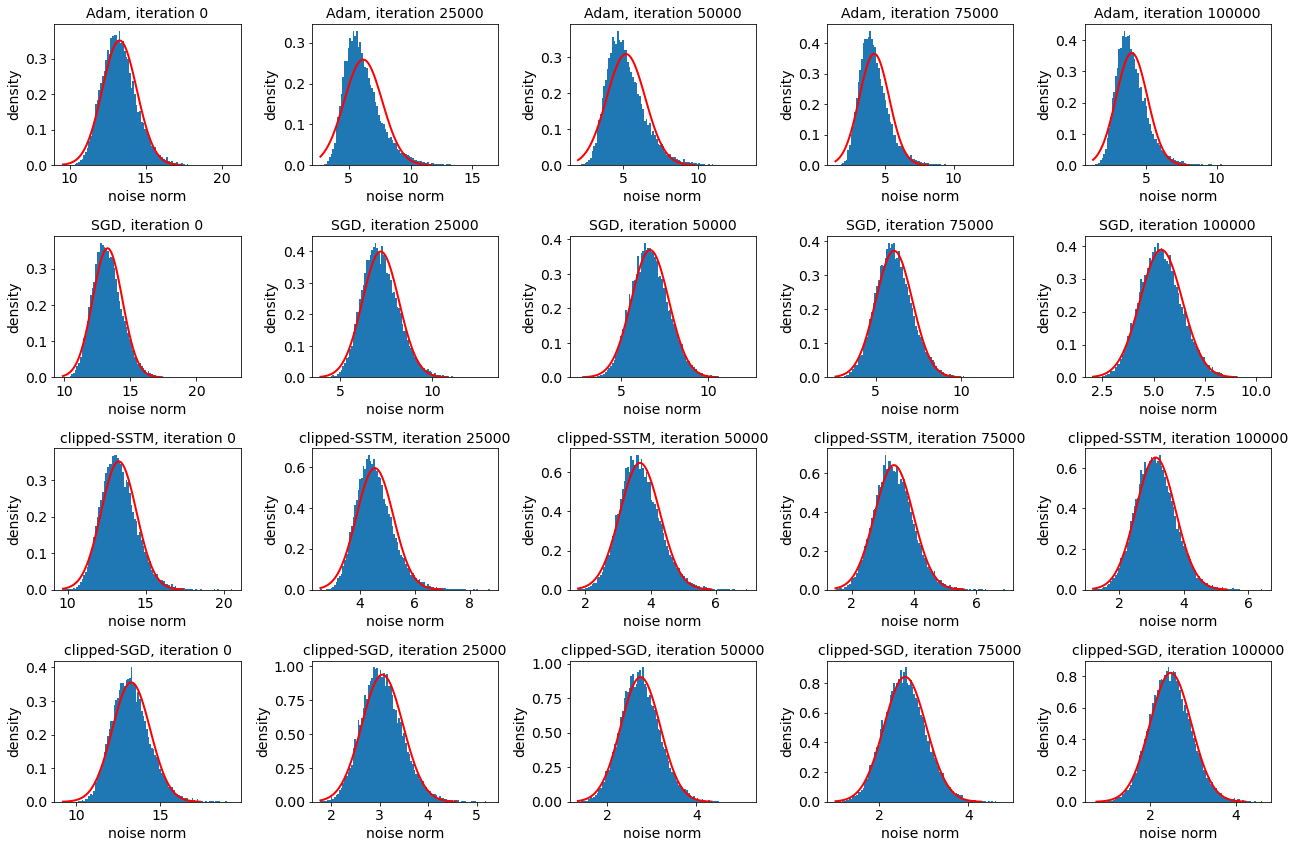

In [37]:
fig = plt.figure(figsize=(18,12))
k = 5
gs = GridSpec(4,k, figure=fig)

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

for j in range(4):
    for i in range(0, k):
        gh = [grouped_hist[j]]
        ax = fig.add_subplot(gs[j,i])
        draw_norm_hists_for_one_model(
            ax, gh, 
            title="{}, iteration {}".format(
                line_params[gh[0]["name"]]["name"], 
                (int(gh[0]["norm_diffs_x"][i]) // 500 * 500)
            ), y_label="density", x_label="noise norm", 
            bins_n=100, draw_normal=True, number=i, grid=False, 
            add_batch_count=False, round_batch_count=True, 
            title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
        )

gs.tight_layout(fig)

PATH = './graphs/ResNet-18_norm_diffs_evolution.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

### EDSR + DIV2K

#### Gradient norms

In [45]:
hists_names_list = [
    "edsr_2021-06-16_00_13_30_train_hist"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [46]:
for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 5.0, Name = same


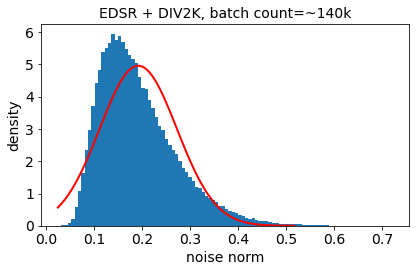

In [47]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="EDSR + DIV2K", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs/EDSR_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

### DeepLabV3 with ResNet50 backbone on PascalVOC 2012

#### Gradient norms

In [59]:
hists_names_list = [
    "deeplabv3_resnet50_2021-06-20_14_21_31_train_hist",
    "deeplabv3_resnet50_2021-06-20_08_41_00_train_hist",
    "deeplabv3_resnet50_2021-06-19_18_44_53_train_hist"
]

hist = hist_from_json(load_hist_jsons(hists_names_list))

In [60]:
for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 20.0, Name = same


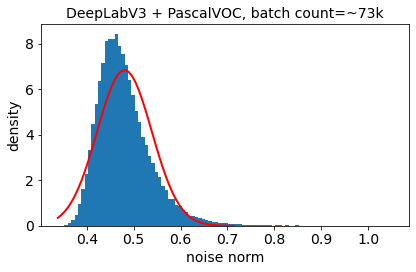

In [61]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="DeepLabV3 + PascalVOC", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs/DeepLabV3_ResNet50_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

# GLUE tasks

## BERT + SST-2

In [3]:
hists_names_list = [
    "bert_sst_2_2021-09-05_21_53_08_train_hist", # combined (ds-10,10,45, 5 epochs)
    "bert_sst_2_2021-09-05_03_39_02_train_hist", # combined (ds-9, 9, 40, 5 epochs)
    "bert_sst_2_2021-09-03_23_29_31_train_hist", # combined (ds-8, 8, 35, 5 epochs)
    "bert_sst_2_2021-09-03_00_07_20_train_hist", # combined (ds-7, 7, 30, 5 epochs)
    "bert_sst_2_2021-09-02_10_32_56_train_hist", # combined (ds-6, 6, 25, 5 epochs)
    "bert_sst_2_2021-09-01_21_40_41_train_hist", # combined (ds-5, 5, 20, 5 epochs)
    "bert_sst_2_2021-09-01_11_10_20_train_hist", # combined (ds-4, 4, 15, 5 epochs)
    "bert_sst_2_2021-09-01_00_05_53_train_hist", # combined (ds-3, 3, 10, 5 epochs)
    "bert_sst_2_2021-09-05_22_41_10_train_hist", # combined (ds-2, 2, 5,  5 epochs)
    "bert_sst_2_2021-09-05_22_40_43_train_hist", # combined (ds-1, 1, 0,  5 epochs)
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/sst-2/"))

chosen_exp_names = {
    "Adam, 5e-4, bs_mul = 1",
    "SGD, 1e-3, 0.9, bs_mul = 1",
    "clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1",
    "clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = 8, nu=1",
    "clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = linear(400), nu=1",
}
new_hist = []
for h in hist:
    if h["name"] in chosen_exp_names:
        new_hist.append(h)
hist = new_hist

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

def key(h, alpha=0.01):
    return smooth(h["train_loss"], alpha)[-1]

grouped_hist = sorted(grouped_hist, key=key)[:10]

Repeats_1 = 50.0, Name = Adam, 5e-4, bs_mul = 1
Repeats_1 = 50.0, Name = SGD, 1e-3, 0.9, bs_mul = 1
Repeats_1 = 50.0, Name = clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1
Repeats_1 = 50.0, Name = clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = 8, nu=1
Repeats_1 = 50.0, Name = clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = linear(400), nu=1


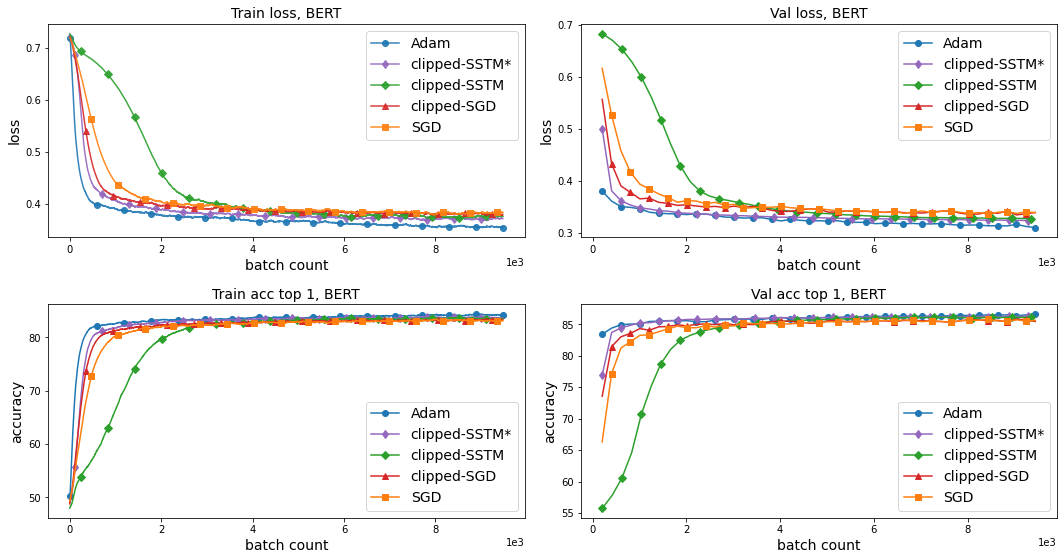

In [4]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(2,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 "Adam, 5e-4, bs_mul = 1": {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 "SGD, 1e-3, 0.9, bs_mul = 1": {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 "clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = 8, nu=1": {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 "clipped_SGD, 2e-3, 0.9, coordinate_wise, 0.1, bs_mul = 1": {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 },
 "clipped_SSTM, 1e-3, 1, norm, 1, bs_mul = linear(400), nu=1": {
     "name": "clipped-SSTM*",
     "line_color": colors[4], "line_style": "-",
     "line_marker": "d", "mark_every": "auto"
 },
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, BERT", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax3 = make_plot(
    ax3, grouped_hist, "train_acc_top_1", "train_x", 
    title="Train acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.01, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_acc_top_1", "val_x", 
    title="Val acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

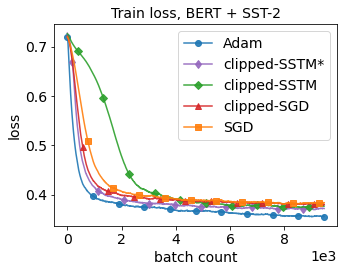

In [5]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT + SST-2", y_label="loss", x_label=x_label, 
    eps=0.005, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=9, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_SST-2_train_loss.pdf'

plt.savefig(PATH, format='pdf')

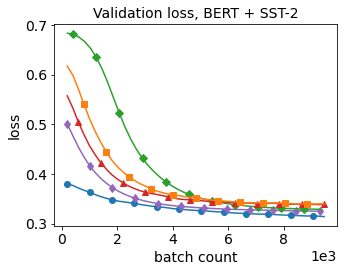

In [6]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, BERT + SST-2", y_label="loss", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_SST-2_val_loss.pdf'

plt.savefig(PATH, format='pdf')

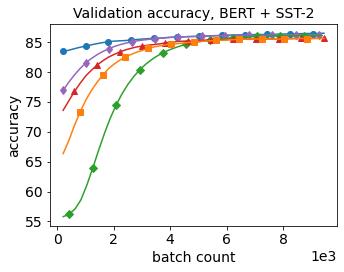

In [7]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_acc_top_1", "val_x", 
    title="Validation accuracy, BERT + SST-2", y_label="accuracy", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_SST-2_val_acc.pdf'

plt.savefig(PATH, format='pdf')

#### norm diffs

In [8]:
hists_names_list = [
    "bert_sst_2_2021-09-08_01_35_02_train_hist", # combined (ds-11,11,50, 5 epochs, with norm diffs)
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/sst-2/"))

for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 25.0, Name = same


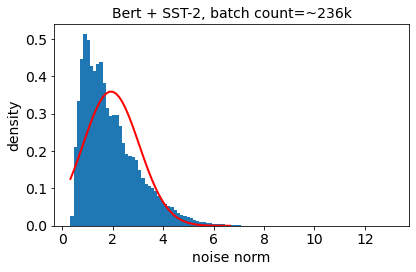

In [9]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + SST-2", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_SST-2_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

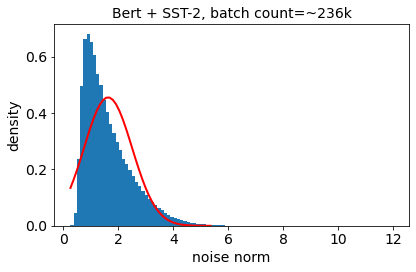

In [10]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + SST-2", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=1, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_SST-2_norm_diffs_second.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

## BERT + MRPC

In [5]:
hists_names_list = [
    "bert_mrpc_2021-09-22_21_31_00_train_hist", # combined (ds-21, 21, 100, 15 epochs)
    "bert_mrpc_2021-09-22_16_27_29_train_hist", # combined (ds-20, 20, 95, 15 epochs)
    "bert_mrpc_2021-09-22_07_51_28_train_hist", # combined (ds-19, 19, 90, 15 epochs)
    "bert_mrpc_2021-09-22_03_35_02_train_hist", # combined (ds-18, 18, 85, 15 epochs)
    "bert_mrpc_2021-09-21_23_10_41_train_hist", # combined (ds-17, 17, 80, 15 epochs)
    "bert_mrpc_2021-09-21_17_32_42_train_hist", # combined (ds-16, 16, 75, 15 epochs)
    "bert_mrpc_2021-09-21_11_22_31_train_hist", # combined (ds-15, 15, 70, 15 epochs) + norm diffs
    "bert_mrpc_2021-09-20_22_03_29_train_hist", # combined (ds-14, 14, 65, 15 epochs) + norm diffs
    "bert_mrpc_2021-09-20_09_24_37_train_hist", # combined (ds-13, 13, 60, 15 epochs)
    "bert_mrpc_2021-09-20_03_45_56_train_hist", # combined (ds-12, 12, 55, 15 epochs)
    "bert_mrpc_2021-09-19_21_34_24_train_hist", # combined (ds-11, 11, 50, 15 epochs)
    "bert_mrpc_2021-09-19_17_12_13_train_hist", # combined (ds-10, 10, 45, 15 epochs)
    "bert_mrpc_2021-09-19_11_55_58_train_hist", # combined (ds-9, 9, 45, 15 epochs)
    "bert_mrpc_2021-09-19_00_27_21_train_hist", # combined (ds-8, 8, 40, 15 epochs)
    "bert_mrpc_2021-09-18_17_06_17_train_hist", # combined (ds-7, 7, 35, 15 epochs)
    "bert_mrpc_2021-09-18_02_32_08_train_hist", # combined (ds-6, 6, 30, 15 epochs)
    "bert_mrpc_2021-09-17_21_13_59_train_hist", # combined (ds-5, 5, 25, 15 epochs)
    "bert_mrpc_2021-09-17_15_39_06_train_hist", # combined (ds-4, 4, 20, 15 epochs)
    "bert_mrpc_2021-09-17_10_20_20_train_hist", # combined (ds-3, 3, 15, 15 epochs)
    "bert_mrpc_2021-09-17_00_34_18_train_hist", # combined (ds-2, 2, 10, 15 epochs)
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/mrpc/"))

chosen_exp_names = {
    "Adam, 5e-4, bs_mul = 1",
    "SGD, 3e-4, 0.99, bs_mul = 1",
    "clipped_SGD, 1e-3, 0.95, coordinate_wise, 0.1, bs_mul = 1",
    "clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = 4, nu=1",
    "clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = linear (100), nu=1",
}
new_hist = []
for h in hist:
    if h["name"] in chosen_exp_names:
        new_hist.append(h)
hist = new_hist

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

def key(h, alpha=0.01):
    return smooth(h["train_loss"], alpha)[-1]

grouped_hist = sorted(grouped_hist, key=key)[:10]

Repeats_1 = 100.0, Name = Adam, 5e-4, bs_mul = 1
Repeats_1 = 100.0, Name = SGD, 3e-4, 0.99, bs_mul = 1
Repeats_1 = 100.0, Name = clipped_SGD, 1e-3, 0.95, coordinate_wise, 0.1, bs_mul = 1
Repeats_1 = 100.0, Name = clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = 4, nu=1
Repeats_1 = 100.0, Name = clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = linear (100), nu=1


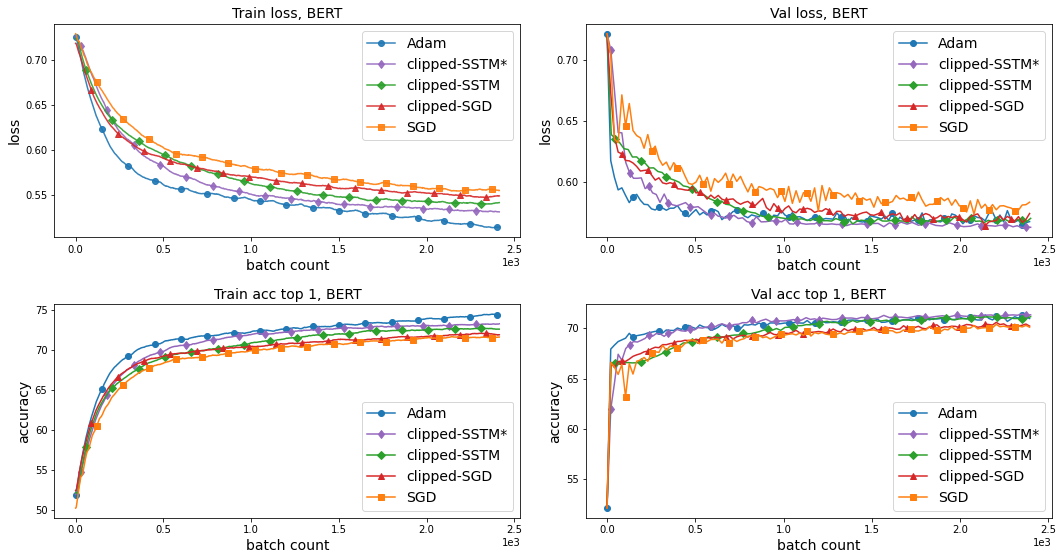

In [6]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(2,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 "Adam, 5e-4, bs_mul = 1": {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 "SGD, 3e-4, 0.99, bs_mul = 1": {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 "clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = 4, nu=1": {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 "clipped_SGD, 1e-3, 0.95, coordinate_wise, 0.1, bs_mul = 1": {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 },
 "clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = linear (100), nu=1": {
     "name": "clipped-SSTM*",
     "line_color": colors[4], "line_style": "-",
     "line_marker": "d", "mark_every": "auto"
 },
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, BERT", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

ax3 = make_plot(
    ax3, grouped_hist, "train_acc_top_1", "train_x", 
    title="Train acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=0.01, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_acc_top_1", "val_x", 
    title="Val acc top 1, BERT", y_label="accuracy", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

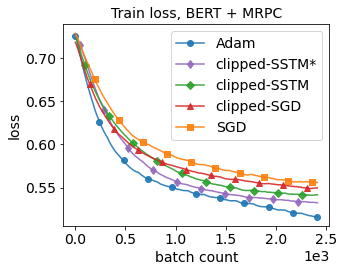

In [7]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT + MRPC", y_label="loss", x_label=x_label, 
    eps=0.005, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=9, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_MRPC_train_loss.pdf'

plt.savefig(PATH, format='pdf')

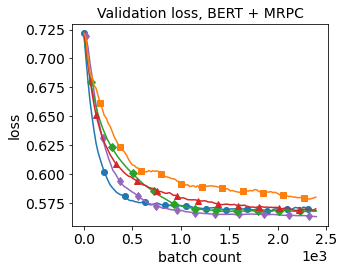

In [8]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, BERT + MRPC", y_label="loss", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_MRPC_val_loss.pdf'

plt.savefig(PATH, format='pdf')

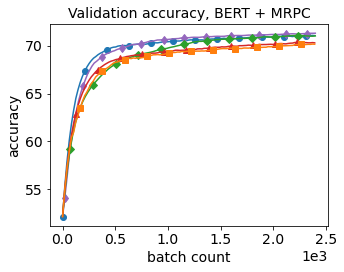

In [10]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_acc_top_1", "val_x", 
    title="Validation accuracy, BERT + MRPC", y_label="accuracy", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_MRPC_val_acc.pdf'

plt.savefig(PATH, format='pdf')

#### norm diffs

In [12]:
hists_names_list = [
    "bert_mrpc_2021-09-21_11_22_31_train_hist", # combined (ds-15, 15, 70, 15 epochs) + norm diffs
    "bert_mrpc_2021-09-20_22_03_29_train_hist", # combined (ds-14, 14, 65, 15 epochs) + norm diffs
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/mrpc"))

for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_acc_top_1", "val_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 50.0, Name = same


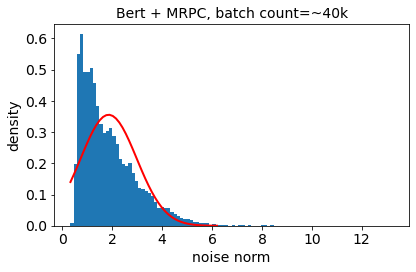

In [13]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + MRPC", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_MRPC_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

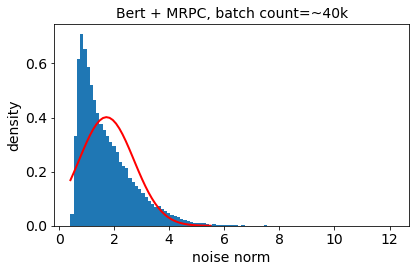

In [14]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + MRPC", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=1, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_MRPC_norm_diffs_second.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

## BERT + STS-B

In [35]:
hists_names_list = [
    "bert_stsb_2021-11-01_23_08_25_train_hist",
    "bert_stsb_2021-10-31_20_48_29_train_hist",
    "bert_stsb_2021-10-29_14_53_41_train_hist",
    "bert_stsb_2021-10-27_19_06_39_train_hist",
    "bert_stsb_2021-10-25_19_41_23_train_hist",
    "bert_stsb_2021-10-23_21_53_38_train_hist",
    "bert_stsb_2021-10-23_08_02_38_train_hist",
    "bert_stsb_2021-10-22_09_32_35_train_hist",
    "bert_stsb_2021-10-21_21_41_13_train_hist",
    "bert_stsb_2021-10-20_17_22_42_train_hist", # combined (ds-3, 4, 20, 15 epochs)
    "bert_stsb_2021-10-19_09_19_00_train_hist", # combined (ds-2, 3, 15, 15 epochs)
    "bert_stsb_2021-10-18_22_04_29_train_hist", # combined (ds-1, 2, 10, 15 epochs)
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/stsb/"))

chosen_exp_names = {
    "Adam, 1e-3, bs_mul = 1",
    "SGD, 1e-4, 0.99, bs_mul = 1",
    "clipped_SGD, 1e-3, 0.995, coordinate_wise, 0.1, bs_mul = 1",
    "clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = 8, nu=1",
    "clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = linear (200), nu=1",
}
new_hist = []
for h in hist:
    if h["name"] in chosen_exp_names:
        new_hist.append(h)
hist = new_hist

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_pearson", "val_pearson"], 
#     ["train_loss", "train_acc_top_1"], 
    verbose=True,
    group_norm_diffs=True
)

def key(h, alpha=0.01):
    return smooth(h["train_loss"], alpha)[-1]

grouped_hist = sorted(grouped_hist, key=key)[:10]

Repeats_1 = 60.0, Name = Adam, 1e-3, bs_mul = 1
Repeats_1 = 60.0, Name = SGD, 1e-4, 0.99, bs_mul = 1
Repeats_1 = 60.0, Name = clipped_SGD, 1e-3, 0.995, coordinate_wise, 0.1, bs_mul = 1
Repeats_1 = 60.0, Name = clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = 8, nu=1
Repeats_1 = 60.0, Name = clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = linear (200), nu=1


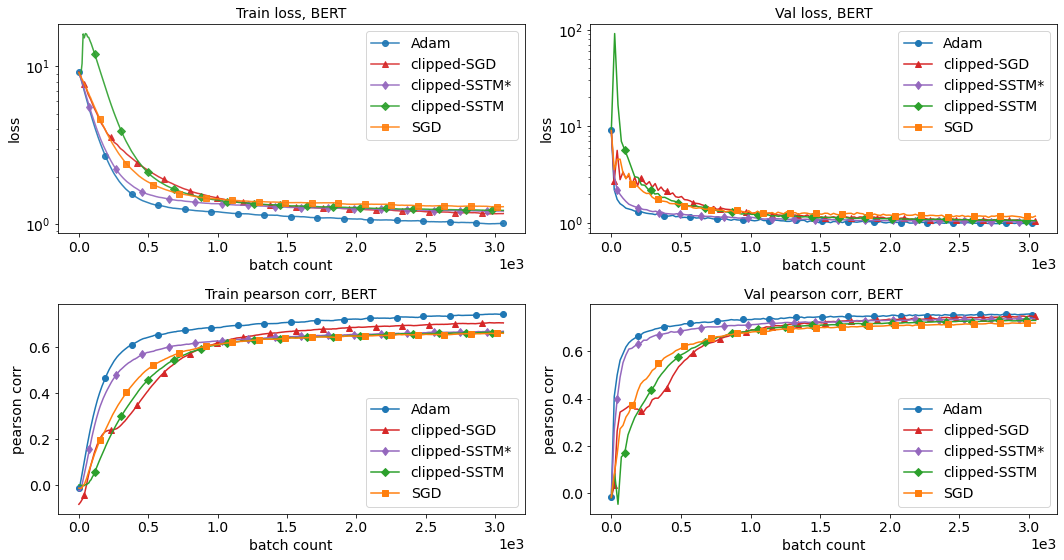

In [36]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(2,2, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

line_params = {
 "Adam, 1e-3, bs_mul = 1": {
     "name": "Adam",
     "line_color": colors[0], "line_style": "-",
     "line_marker": "o", "mark_every": "auto"
 },
 "SGD, 1e-4, 0.99, bs_mul = 1": {
     "name": "SGD",
     "line_color": colors[1], "line_style": "-",
     "line_marker": "s", "mark_every": "auto"
 },
 "clipped_SSTM, 1e-2, 1, norm, 1, bs_mul = 8, nu=1": {
     "name": "clipped-SSTM",
     "line_color": colors[2], "line_style": "-",
     "line_marker": "D", "mark_every": "auto"
 },
 "clipped_SGD, 1e-3, 0.995, coordinate_wise, 0.1, bs_mul = 1": {
     "name": "clipped-SGD",
     "line_color": colors[3], "line_style": "-",
     "line_marker": "^", "mark_every": "auto"
 },
 "clipped_SSTM, 3e-3, 1, norm, 1, bs_mul = linear (200), nu=1": {
     "name": "clipped-SSTM*",
     "line_color": colors[4], "line_style": "-",
     "line_marker": "d", "mark_every": "auto"
 },
}

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT", y_label="loss", x_label=x_label, 
    eps=0.01, alpha=0.9, starting_epoch=0, draw_epoch_lines=False, grid=False, 
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)
ax1.set_yscale("log")

ax2 = make_plot(
    ax2, grouped_hist, "val_loss", "val_x", 
    title="Val loss, BERT", y_label="loss", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)
ax2.set_yscale("log")

ax3 = make_plot(
    ax3, grouped_hist, "train_pearson", "train_x", 
    title="Train pearson corr, BERT", y_label="pearson corr", x_label=x_label, 
    eps=0.01, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)


ax4 = make_plot(
    ax4, grouped_hist, "val_pearson", "val_x", 
    title="Val pearson corr, BERT", y_label="pearson corr", x_label=x_label, 
    eps=1.0, alpha=1.0, starting_epoch=0, draw_epoch_lines=False, grid=False,
    mark_every_count=15, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)
plt.draw()
plt.show()

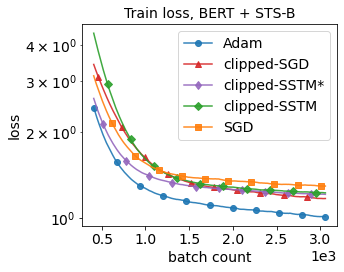

In [46]:
fig = plt.figure(figsize=(5, 4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "train_loss", "train_x", 
    title="Train loss, BERT + STS-B", y_label="loss", x_label=x_label, 
    eps=0.005, alpha=0.9, starting_epoch=2, draw_epoch_lines=False, grid=False, 
    mark_every_count=9, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)
ax1.set_yscale("log")

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_STS-B_train_loss.pdf'

plt.savefig(PATH, format='pdf')

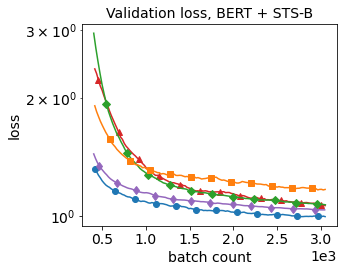

In [47]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)


display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_loss", "val_x", 
    title="Validation loss, BERT + STS-B", y_label="loss", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=2, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)
ax1.set_yscale("log")

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_STS-B_val_loss.pdf'

plt.savefig(PATH, format='pdf')

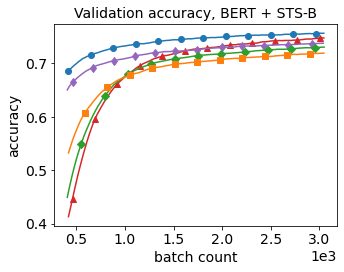

In [48]:
fig = plt.figure(figsize=(5,4))
gs = GridSpec(1, 1, figure=fig)

display.clear_output(wait=True)

ax1 = fig.add_subplot(gs[0,0])

ax1 = make_plot(
    ax1, grouped_hist, "val_pearson", "val_x", 
    title="Validation accuracy, BERT + STS-B", y_label="accuracy", x_label=x_label, 
    eps=0.2, alpha=1.0, starting_epoch=2, draw_epoch_lines=False, grid=False, legend=False,
    mark_every_count=10, title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize,
    line_params=line_params
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_STS-B_val_acc.pdf'

plt.savefig(PATH, format='pdf')

#### norm diffs

In [56]:
hists_names_list = [
    "bert_stsb_2022-03-20_22_42_05_train_hist"
]

hist = hist_from_json(load_hist_jsons(hists_names_list, path="./results/glue_data/stsb"))

for h in hist:
    h["name"] = "same"

grouped_hist = group_uniques_full(
    hist, 
    ["train_loss", "val_loss", "train_pearson", "val_pearson"], 
    verbose=True,
    group_norm_diffs=True
)

Repeats_1 = 25.0, Name = same


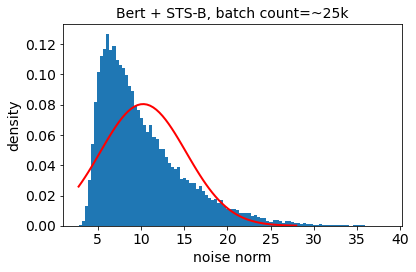

In [57]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + STS-B", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=0, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_STS-B_norm_diffs_start.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()

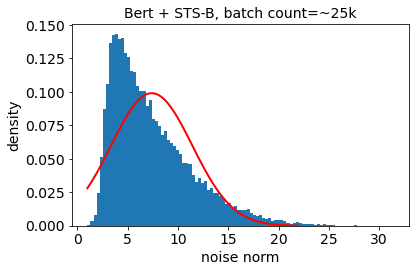

In [58]:
fig = plt.figure(figsize=(6,4))
gs = GridSpec(1,1, figure=fig)
ax = fig.add_subplot(gs[0,0])

display.clear_output(wait=True)

# grouped_hist_for_distrs = [grouped_hist[0], grouped_hist[1], grouped_hist[3]]

draw_norm_hists_for_one_model(
    ax, grouped_hist, 
    title="Bert + STS-B", y_label="density", x_label="noise norm", 
    bins_n=100, draw_normal=True, number=1, grid=False, 
    add_batch_count=True, round_batch_count=True, 
    title_fontsize=title_fontsize, xy_label_fontsize=xy_label_fontsize
)

gs.tight_layout(fig)

PATH = './graphs_glue/BERT_STS-B_norm_diffs_second.pdf'

plt.savefig(PATH, format='pdf')

plt.draw()
plt.show()